nr of spikes: 0


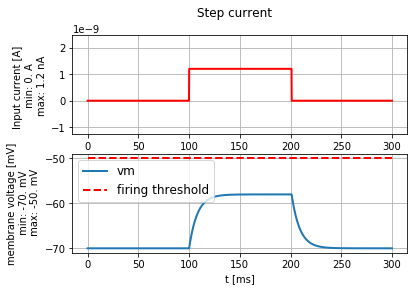

nr of spikes: 5


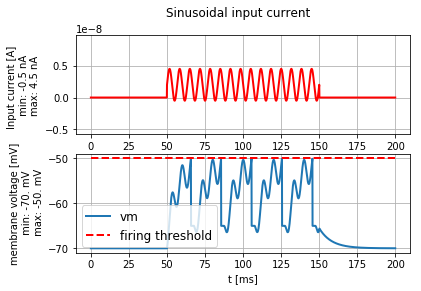

Resting potential: -70. mV
Reset voltage: -65. mV
Firing threshold: -50. mV
Membrane resistance: 10. Mohm
Membrane time-scale: 8. ms
Absolute refractory period: 2. ms


In [2]:
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.leaky_integrate_and_fire import LIF
from neurodynex.tools import input_factory,plot_tools

LIF.getting_started()
plt.show()
LIF.print_default_parameters()

In [3]:
print("resting potential:{}".format(LIF.V_REST))

resting potential:-70. mV


nr of spikes: 7


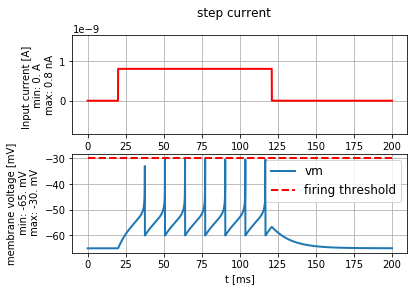

In [6]:
% matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex.tools import plot_tools, input_factory


input_current = input_factory.get_step_current(
    t_start=20, t_end=120, unit_time=b2.ms, amplitude=0.8 * b2.namp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=200*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current",
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))


nr of spikes: 1


Text(0,0.5,'min amplitude [nAmp]')

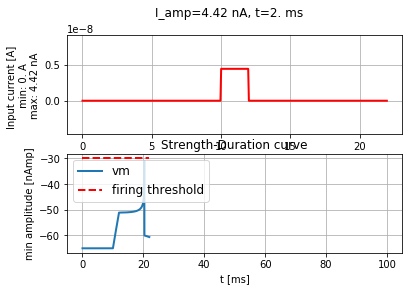

In [7]:
% matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex.tools import plot_tools, input_factory

i=1  #change i and find the value that goes into min_amp
durations = [1,   2,    5,  10,   20,   50, 100]
min_amp =   [0., 4.42, 0., 1.10, .70, .48, 0.]

t=durations[i]
I_amp = min_amp[i]*b2.namp
title_txt = "I_amp={}, t={}".format(I_amp, t*b2.ms)

input_current = input_factory.get_step_current(t_start=10, t_end=10+t-1, unit_time=b2.ms, amplitude=I_amp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(I_stim=input_current, simulation_time=(t+20)*b2.ms)

plot_tools.plot_voltage_and_current_traces(state_monitor, input_current,
                                           title=title_txt, firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike,
                                          legend_location=2)
print("nr of spikes: {}".format(spike_monitor.count[0]))

plt.plot(durations, min_amp)
plt.title("Strength-Duration curve")
plt.xlabel("t [ms]")
plt.ylabel("min amplitude [nAmp]")

nr of spikes: 10


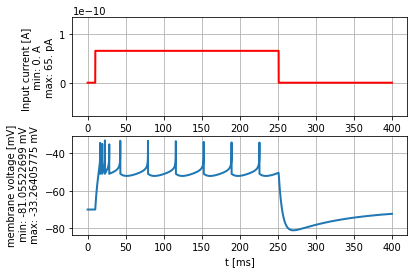

In [8]:
% matplotlib inline
import brian2 as b2
from neurodynex.adex_model import AdEx
from neurodynex.tools import plot_tools, input_factory

current = input_factory.get_step_current(10, 250, 1. * b2.ms, 65.0 * b2.pA)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim=current, simulation_time=400 * b2.ms)
plot_tools.plot_voltage_and_current_traces(state_monitor, current)
print("nr of spikes: {}".format(spike_monitor.count[0]))
# AdEx.plot_adex_state(state_monitor)

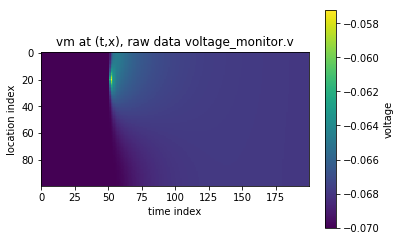

In [10]:
from neurodynex.cable_equation import passive_cable
passive_cable.getting_started()

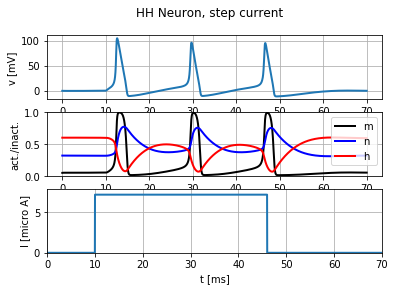

In [13]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.hodgkin_huxley import HH
from neurodynex.tools import input_factory

HH.getting_started()

In [14]:
b2.defaultclock.dt = 0.02*b2.ms
fast_ramp_t_end = 80  # no spike. make it longer
fast_ramp_current = input_factory.get_ramp_current(50, fast_ramp_t_end, 0.1*b2.ms, 0.*b2.uA, 4.5*b2.uA)
state_monitor = HH.simulate_HH_neuron(fast_ramp_current, 40 * b2.ms)
idx_t_end = int(round(fast_ramp_t_end*0.1*b2.ms / b2.defaultclock.dt))
voltage_fast = state_monitor.vm[0,idx_t_end]
print("voltage_fast={}".format(voltage_fast))

voltage_fast=4.93704929 mV


fixed_point: (-1.0000000000000002, -4.4408920985006262e-16)


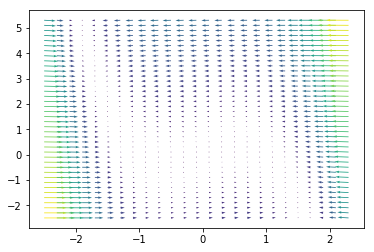

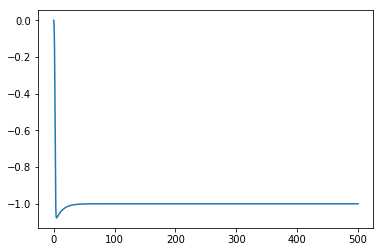

In [15]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.phase_plane_analysis import fitzhugh_nagumo

fitzhugh_nagumo.plot_flow()

fixed_point = fitzhugh_nagumo.get_fixed_point()
print("fixed_point: {}".format(fixed_point))

plt.figure()
trajectory = fitzhugh_nagumo.get_trajectory()
plt.plot(trajectory[0], trajectory[1])

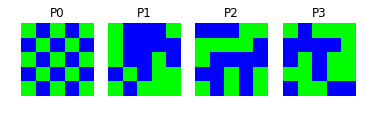

WARNING    /usr/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
 [py.warnings]


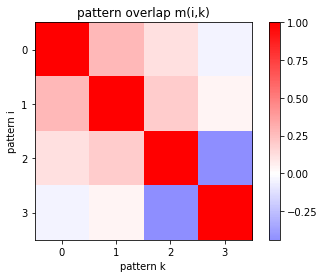

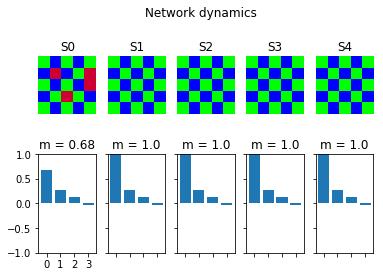

In [16]:
%matplotlib inline
from neurodynex.hopfield_network import network, pattern_tools, plot_tools

pattern_size = 5

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=3, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)
# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=4)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")


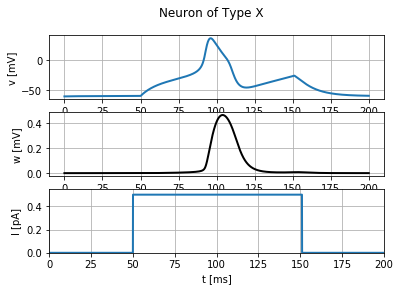

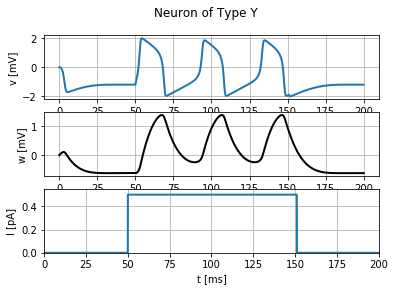

In [18]:
%matplotlib inline 
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.tools import input_factory, plot_tools, spike_tools
from neurodynex.neuron_type import neurons

# create an input current
input_current = input_factory.get_step_current(50, 150, 1.*b2.ms, 0.5*b2.pA)

# get one instance of class NeuronX and save that object in the variable 'a_neuron_of_type_X'
a_neuron_of_type_X = neurons.NeuronX()  # we do not know if it's type I or II
# simulate it and get the state variables
state_monitor = a_neuron_of_type_X.run(input_current, 200*b2.ms)
# plot state vs. time
neurons.plot_data(state_monitor, title="Neuron of Type X")

# get an instance of class NeuronY
a_neuron_of_type_Y = neurons.NeuronY()  # we do not know if it's type I or II
state_monitor = a_neuron_of_type_Y.run(input_current, 200*b2.ms)
neurons.plot_data(state_monitor, title="Neuron of Type Y")

The final weight vector w is: (0.5472989297234275,0.8372456311464277)


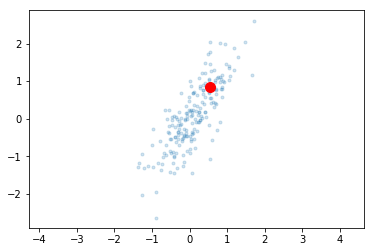

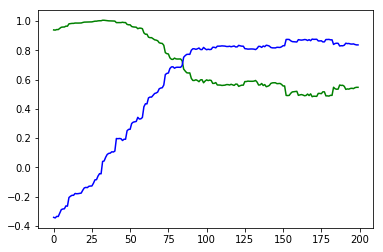

In [19]:
%matplotlib inline
import neurodynex.ojas_rule.oja as oja
import matplotlib.pyplot as plt

cloud = oja.make_cloud(n=200, ratio=.3, angle=60)
wcourse = oja.learn(cloud, initial_angle=-20, eta=0.04)
plt.scatter(cloud[:, 0], cloud[:, 1], marker=".", alpha=.2)
plt.plot(wcourse[-1, 0], wcourse[-1, 1], "or", markersize=10)
plt.axis('equal')
plt.figure()
plt.plot(wcourse[:, 0], "g")
plt.plot(wcourse[:, 1], "b")
print("The final weight vector w is: ({},{})".format(wcourse[-1,0],wcourse[-1,1]))

INFO       width adjusted from 1. ms to 1.05 ms [brian2.monitors.ratemonitor.adjusted_width]


(<matplotlib.figure.Figure at 0x7f162da241d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f161f1b8240>)

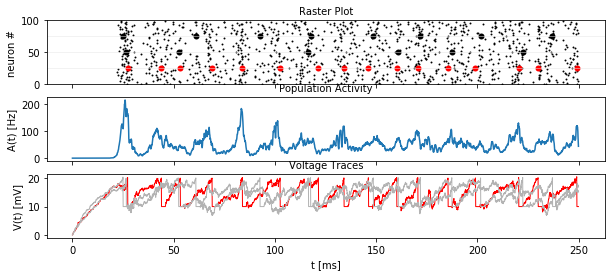

In [20]:
%matplotlib inline
from neurodynex.brunel_model import LIF_spiking_network
from neurodynex.tools import plot_tools
import brian2 as b2

rate_monitor, spike_monitor, voltage_monitor, monitored_spike_idx = LIF_spiking_network.simulate_brunel_network(sim_time=250. * b2.ms)
plot_tools.plot_network_activity(rate_monitor, spike_monitor, voltage_monitor, spike_train_idx_list=monitored_spike_idx, t_min=0.*b2.ms)


INFO       width adjusted from 1. ms to 1.1 ms [brian2.monitors.ratemonitor.adjusted_width]


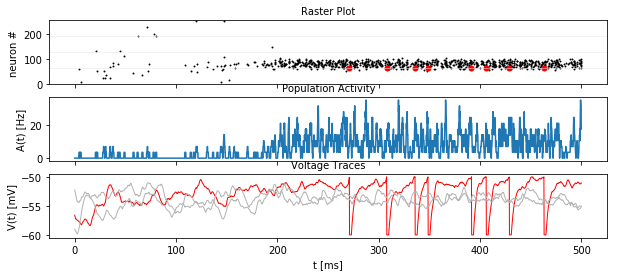

In [21]:
%matplotlib inline
from neurodynex.working_memory_network import wm_model
from neurodynex.tools import plot_tools
import brian2 as b2

wm_model.getting_started()

stimulus start: 150. ms, stimulus end: 0.5 s
simulating 426 neurons. Start: Tue Dec 26 09:36:17 2017
sim end: Tue Dec 26 09:41:01 2017


INFO       width adjusted from 20. ms to 20.1 ms [brian2.monitors.ratemonitor.adjusted_width]


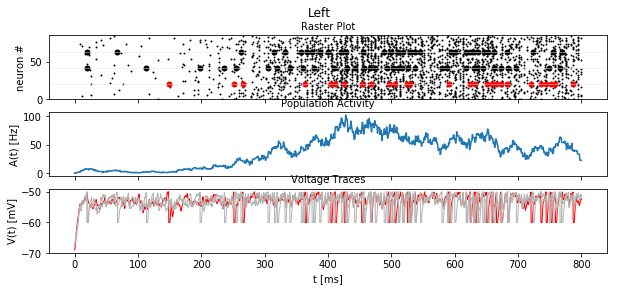

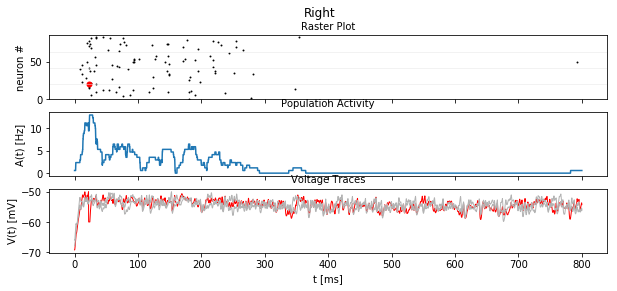

In [22]:
%matplotlib inline
from neurodynex.competing_populations import decision_making

decision_making.getting_started()